In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/amazonreviews.tsv",sep='\t')
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


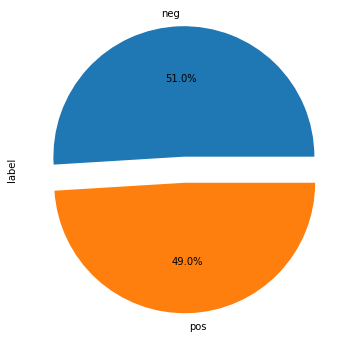

In [ ]:
df["label"].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%', figsize=(6,6))

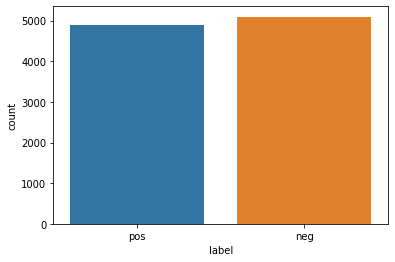

In [ ]:
# plot of traget values
import seaborn as sns
sns.countplot(x='label',data=df)

In [ ]:
#importing all the required libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import tokenize

In [ ]:
df.review=df.review.apply(lambda x: x.lower())
df.review[1]

"the best soundtrack ever to anything.: i'm reading a lot of reviews saying that this is the best 'game soundtrack' and i figured that i'd write a review to disagree a bit. this in my opinino is yasunori mitsuda's ultimate masterpiece. the music is timeless and i'm been listening to it for years now and its beauty simply refuses to fade.the price tag on this is pretty staggering i must say, but if you are going to buy any cd for this much money, this is the only one that i feel would be worth every penny."

In [ ]:
!pip install contractions
import contractions

# Expanding contractions
def con(text):
  expand=contractions.fix(text)
  return expand

df.review=df.review.apply(con)
df['review'][0]

     |████████████████████████████████| 317kB 9.9MB/s 
     |████████████████████████████████| 245kB 13.8MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81705 sha256=8c23ff1efc84d8ae600b34fc176ee967c6602f7cb1a04e3681c59631576c9d5d
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick


'stuning even for the non-gamer: this sound track was beautiful! it paints the senery in your mind so well i would recomend it even to people who hate vid. game music! i have played the game chrono cross but out of all of the games i have ever played it has the best music! it backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. it would impress anyone who cares to listen! ^_^'

In [ ]:
import string

def remove_punc(text):
    for i in string.punctuation:
        text=text.replace(i,' ')
    
    return text

df.review=df.review.apply(remove_punc)

In [ ]:
df.review[4]

'remember  pull your jaw off the floor after hearing it  if you have played the game  you know how divine the music is  every single song tells a story of the game  it is that good  the greatest songs are without a doubt  chrono cross  time s scar  magical dreamers  the wind  the stars  and the sea and radical dreamers  unstolen jewel   translation varies  this music is perfect if you ask me  the best it can be  yasunori mitsuda just poured his heart on and wrote it down on paper '

In [ ]:
nltk.download('stopwords')
stopword_list=stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')
print(stopword_list)

df.review=df.review.apply(lambda x : " ".join(x for x in x.split() if x not in stopword_list))
df['review'][5]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

"['absolute', 'masterpiece', 'quite', 'sure', 'actually', 'taking', 'time', 'read', 'played', 'game', 'least', 'heard', 'least', 'track', 'whether', 'aware', 'not', 'mitsuda', 'music', 'contributed', 'greatly', 'mood', 'every', 'single', 'minute', 'whole', 'game', 'composed', '3', 'cd', 'quite', 'song', 'not', 'exact', 'count', 'heart', 'rendering', 'impressively', 'remarkable', 'soundtrack', 'one', 'assure', 'not', 'forget', 'everything', 'every', 'listener', 'fast', 'paced', 'energetic', 'dancing', 'tokage', 'termina', 'home', 'slower', 'haunting', 'dragon', 'god', 'purely', 'beautifully', 'composed', 'time', 'scar', 'even', 'fantastic', 'vocal', 'radical', 'dreamer', 'one', 'best', 'videogame', 'soundtrack', 'surely', 'mitsuda', 'best', 'ever']"

In [ ]:
nltk.download('punkt')
df['review']=df.review.apply(word_tokenize)
df['review'][0]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['stuning',
 'even',
 'non',
 'gamer',
 'sound',
 'track',
 'beautiful',
 'paints',
 'senery',
 'mind',
 'well',
 'would',
 'recomend',
 'even',
 'people',
 'hate',
 'vid',
 'game',
 'music',
 'played',
 'game',
 'chrono',
 'cross',
 'games',
 'ever',
 'played',
 'best',
 'music',
 'backs',
 'away',
 'crude',
 'keyboarding',
 'takes',
 'fresher',
 'step',
 'grate',
 'guitars',
 'soulful',
 'orchestras',
 'would',
 'impress',
 'anyone',
 'cares',
 'listen']

In [ ]:
nltk.download('wordnet')
lemmatizer=WordNetLemmatizer()
df['review']=df.review.apply(lambda x:[lemmatizer.lemmatize(word) for word in x])


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df.review= df.review.astype(str)


In [ ]:
x = df.iloc[:,1].values 
y = df.iloc[:,0].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

In [ ]:
from sklearn.svm import SVC
clf=SVC()
clf.fit(x_train_tfidf,y_train)

y_pred=clf.predict(x_test_tfidf)
print(y_pred, y_test)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred=clf.predict(x_test_tfidf)
print(y_pred, y_test)

['neg' 'pos' 'neg' ... 'neg' 'neg' 'pos'] ['neg' 'pos' 'neg' ... 'pos' 'neg' 'pos']


In [ ]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
print()
print(accuracy_score(y_pred,y_test))

0.8784

In [ ]:
message=["Congratulations on building your first Sentiment Analysis model! You're going great!"]
message=tfidf.transform(message).toarray()
clf.predict(message)[0]

'pos'